In [1]:
pip install torchviz

  Preparing metadata (setup.py) ... - done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4151 sha256=76d33825ced5b7229af7a08becd2a84891a9e8f8427efd0b4397c041f526ddd6
  Stored in directory: /root/.cache/pip/wheels/18/0c/ac/81bacd5a53085ac633beb52c80c08152db65a81e93b15b392d
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from PIL import Image
from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from torchviz import make_dot

In [3]:
class convents(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=4, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dropout1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dropout2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
net = convents()
# Loss functions and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

net

convents(
  (conv1): Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

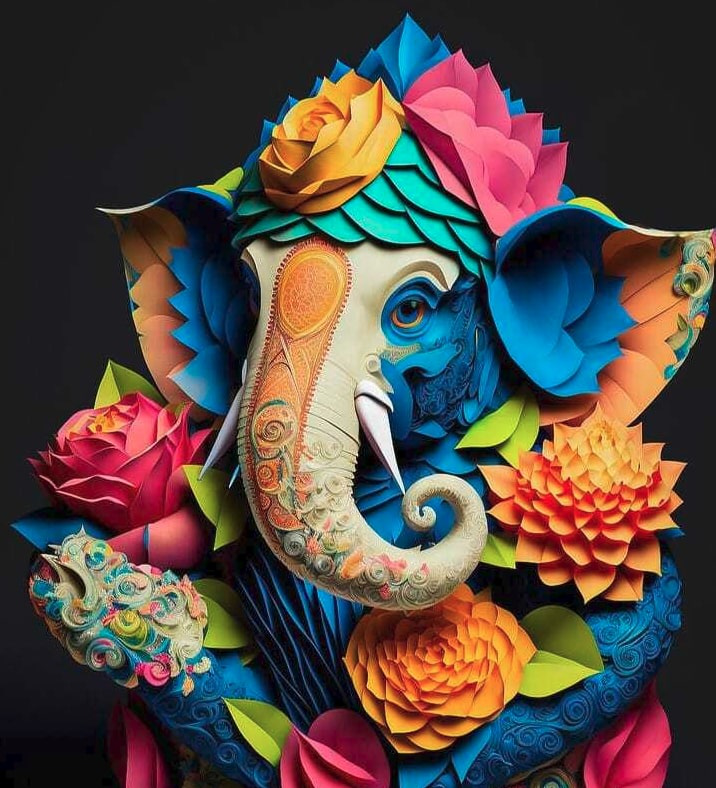

In [4]:
img = Image.open("/kaggle/input/ganesh/Ganesh.jpg")
img

In [5]:
# transform the image to pytorch tensor
transform = transforms.Compose([
    transforms.ToTensor(),
])


img = transform(img)
img.shape

torch.Size([3, 788, 716])

In [6]:
# Get activations of the first convolutional layer
conv1 = net.conv1
print('First Convulution Layer :',conv1)

# APPLY THE FIRST Convolutional layer to the image
y = conv1(img)
print('Output Shape :',y.shape)

First Convulution Layer : Conv2d(3, 32, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
Output Shape : torch.Size([32, 787, 715])


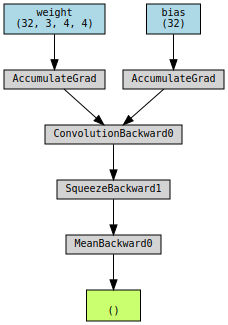

In [7]:
make_dot(y.mean(), params=dict(conv1.named_parameters()))

In [8]:
# Get weights of the first convolutional layer
weights = conv1.weight.detach().numpy()
weights.shape

(32, 3, 4, 4)

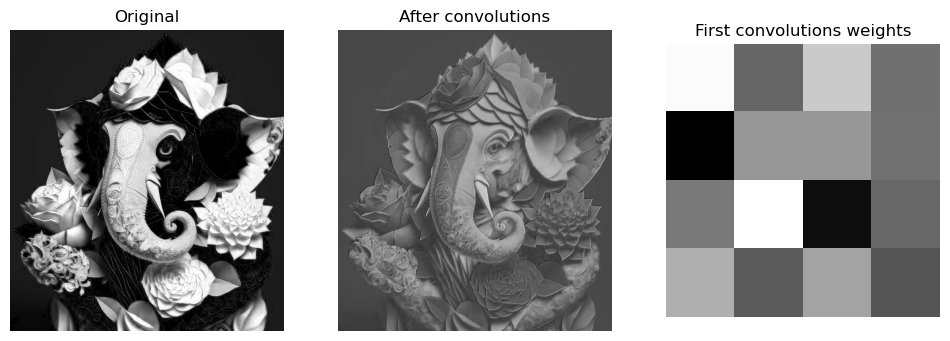

In [9]:
plt.figure(figsize =(12,5))

# Plot the original grayscale image
plt.subplot(1,3,1)
plt.imshow(img[0],cmap = 'gray')
plt.title('Original')
plt.axis('off')
img = Variable(img.unsqueeze(0), requires_grad=True)


#Plot the convolved grayscale image

# Sqeeze tensor to numpy image
img_conv1 = y.detach().numpy()
img_conv1 = np.squeeze(img_conv1)

plt.subplot(1,3,2)
plt.imshow(img_conv1[0], cmap = 'gray')
plt.axis('off')
plt.title('After convolutions')

# Plot the weights of the first convolutional layer

# Sqeeze tensor to numpy image
weights = np.squeeze(weights)

plt.subplot(1,3,3)
plt.imshow(weights[0,0,:,:], cmap='gray')
plt.axis('off')
plt.title('First convolutions weights')
plt.show()

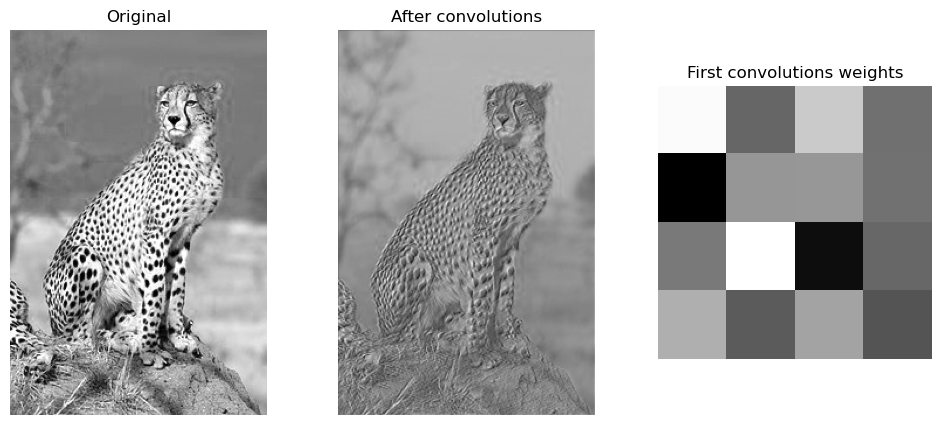

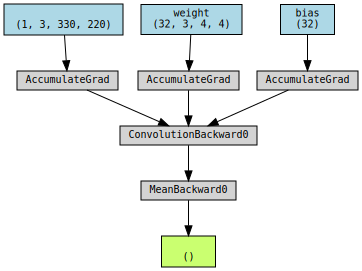

In [10]:
img = Image.open("/kaggle/input/ganesh/Cheeta1.jpg")
img = transform(img)

plt.figure(figsize =(12,5))
# Plot the original grayscale image
plt.subplot(1,3,1)
plt.imshow(img[0],cmap = 'gray')
plt.axis('off')
plt.title('Original')
img = Variable(img.unsqueeze(0), requires_grad=True)

# Get activations of the first convolutional layer
conv1 = net.conv1

# APPLY THE FIRST Convolutional layer
y = conv1(img)
img_conv1 = y.detach().numpy()
img_conv1 = np.squeeze(img_conv1)

# Plot the convolved grayscale image
plt.subplot(1,3,2)
plt.imshow(img_conv1[0], cmap = 'gray')
plt.axis('off')
plt.title('After convolutions')


# Get weights of the first convolutional layer
weights = conv1.weight.detach().numpy()
weights = np.squeeze(weights)

# Plot the weights of the first convolutional layer

plt.subplot(1,3,3)
plt.imshow(weights[0,0,:,:], cmap='gray')
plt.axis('off')
plt.title('First convolutions weights')
plt.show()

make_dot(y.mean(), params=dict(conv1.named_parameters()))

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

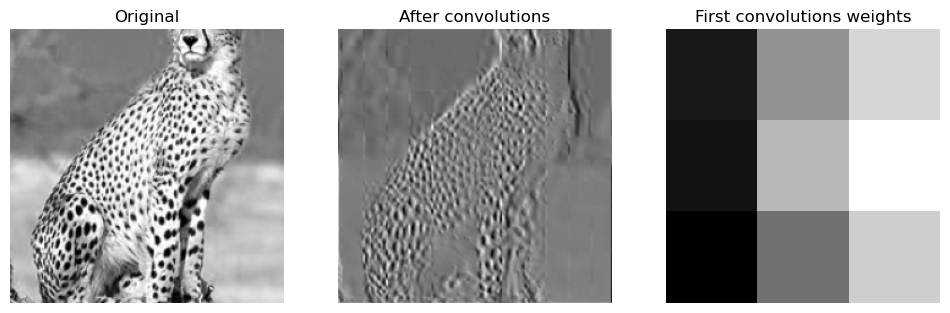

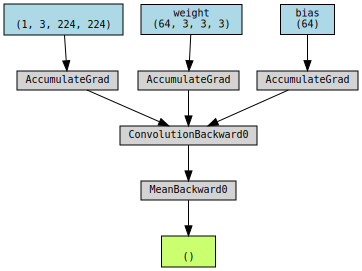

In [11]:
# Import necessary libraries
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from torch.autograd import Variable
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot

# Load a pre-trained VGG16 model
model = models.vgg16(pretrained=True)

# Transformations
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load an image and transformed it
img = transform(Image.open("/kaggle/input/ganesh/Cheeta1.jpg"))
#img = Variable(img.unsqueeze(0), requires_grad=True)

plt.figure(figsize =(12,5))
# Plot the original grayscale image
plt.subplot(1,3,1)
plt.imshow(img[0],cmap = 'gray')
plt.axis('off')
plt.title('Original')
img = Variable(img.unsqueeze(0), requires_grad=True)

# Get activations of the first convolutional layer
conv1 = model.features[0]

# APPLY THE FIRST Convolutional layer
y = conv1(img)
img_conv1 = y.detach().numpy()
img_conv1 = np.squeeze(img_conv1)

# Plot the convolved grayscale image
plt.subplot(1,3,2)
plt.imshow(img_conv1[0], cmap = 'gray')
plt.axis('off')
plt.title('After convolutions')


# Get weights of the first convolutional layer
weights = conv1.weight.detach().numpy()
weights = np.squeeze(weights)

# Plot the weights of the first convolutional layer
plt.subplot(1,3,3)
plt.imshow(weights[0,0,:,:], cmap='gray')
plt.axis('off')
plt.title('First convolutions weights')
plt.show()

make_dot(y.mean(), params=dict(conv1.named_parameters()))

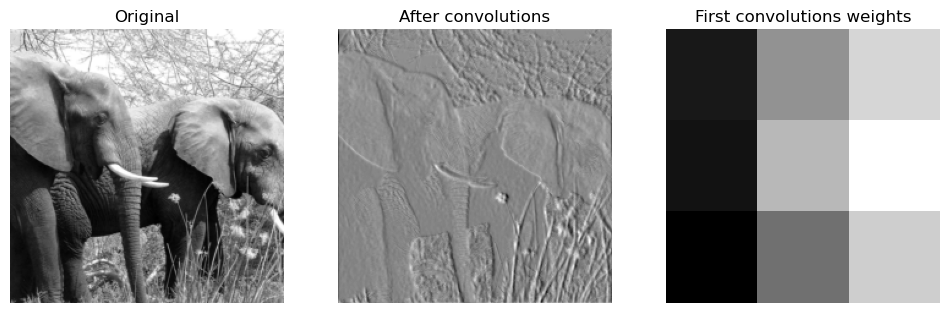

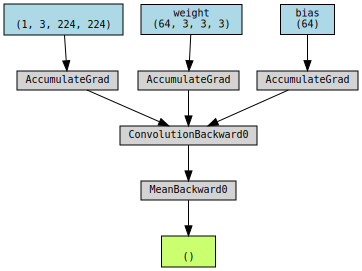

In [12]:
img = transform(Image.open("/kaggle/input/ganesh/elephant.jpg"))

plt.figure(figsize =(12,5))
# Plot the original grayscale image
plt.subplot(1,3,1)
plt.imshow(img[0],cmap = 'gray')
plt.axis('off')
plt.title('Original')
img = Variable(img.unsqueeze(0), requires_grad=True)

# Get activations of the first convolutional layer
conv1 = model.features[0]

# APPLY THE FIRST Convolutional layer
y = conv1(img)
img_conv1 = y.detach().numpy()
img_conv1 = np.squeeze(img_conv1)

# Plot the convolved grayscale image
plt.subplot(1,3,2)
plt.imshow(img_conv1[0], cmap = 'gray')
plt.axis('off')
plt.title('After convolutions')


# Get weights of the first convolutional layer
weights = conv1.weight.detach().numpy()
weights = np.squeeze(weights)

# Plot the weights of the first convolutional layer

plt.subplot(1,3,3)
plt.imshow(weights[0,0,:,:], cmap='gray')
plt.axis('off')
plt.title('First convolutions weights')
plt.show()

make_dot(y.mean(), params=dict(conv1.named_parameters()))